In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import time

## PID Controller Function

In [2]:
# Step 2: Define the PID Controller Class
class PIDController:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint

        self.integral = 0
        self.last_error = 0
        self.last_time = None

    def compute(self, current_value, current_time):
        if self.last_time is None:
            self.last_time = current_time

        dt = current_time - self.last_time
        error = self.setpoint - current_value

        self.integral += error * dt
        derivative = (error - self.last_error) / dt if dt > 0 else 0

        output = (self.Kp * error) + (self.Ki * self.integral) + (self.Kd * derivative)

        self.last_error = error
        self.last_time = current_time

        return output


## Main Simulation Function

In [3]:
# Step 3: Simulate Room Temperature and Heater Power
def simulate_temperature_control(duration_sec=300, dt=1):
    pid = PIDController(Kp=2.0, Ki=0.1, Kd=1.0, setpoint=25.0)

    # Initial conditions
    temp = 20.0
    heater_power = 0.0
    ambient_temp = 20.0

    # For plotting
    time_log = []
    temp_log = []
    power_log = []

    for t in range(0, duration_sec, dt):
        current_time = t

        # PID output
        control_signal = pid.compute(temp, current_time)

        # Clamp control signal to heater power range (0 to 100)
        heater_power = max(0, min(100, control_signal))

        # Simple simulation model
        heating_effect = 0.05 * heater_power
        cooling_effect = 0.01 * (temp - ambient_temp)
        temp += heating_effect - cooling_effect

        # Logging
        time_log.append(t)
        temp_log.append(temp)
        power_log.append(heater_power)

    return time_log, temp_log, power_log


In [4]:
# Step 4: Run Simulation
time_log, temp_log, power_log = simulate_temperature_control()

## Simulation Loop

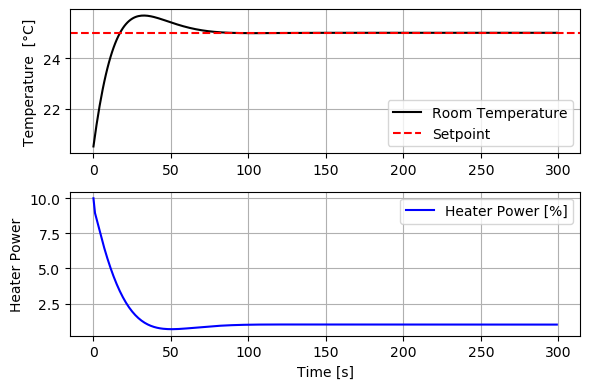

In [5]:
# Step 5: Plot the Results
plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
plt.plot(time_log, temp_log, label='Room Temperature', color='k')
plt.axhline(25.0, color='red', linestyle='--', label='Setpoint')
plt.ylabel('Temperature  [°C]')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_log, power_log, label='Heater Power [%]', color='blue')
plt.xlabel('Time [s]')
plt.ylabel('Heater Power')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
